## PREPROCESSING AND DATA ANALYSIS

**Import the Required Libraries**

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

**Load the Train and Test Datasets and store them as dataframes**

In [276]:
# Loading the training dataset
df=pd.read_csv("training_set.csv")
# Loading the testing dataset
dt=pd.read_csv("testing_set.csv")

**Analysing the Train Dataset**

In [277]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


**Analysing the Test Dataset**

In [279]:
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [280]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


## Data Analysis

**Checking the null values in train dataset**

In [281]:
df.isna().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Gender               15
Dependents           15
Loan_Amount_Term     14
Married               3
ApplicantIncome       2
Education             1
CoapplicantIncome     1
Loan_ID               0
property_Area         0
Loan_Status           0
dtype: int64

**Checking the null values in test dataset**

In [282]:
dt.isna().sum().sort_values(ascending = False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
property_Area         0
dtype: int64

**Visualising the missing values in train dataset**

<Axes: >

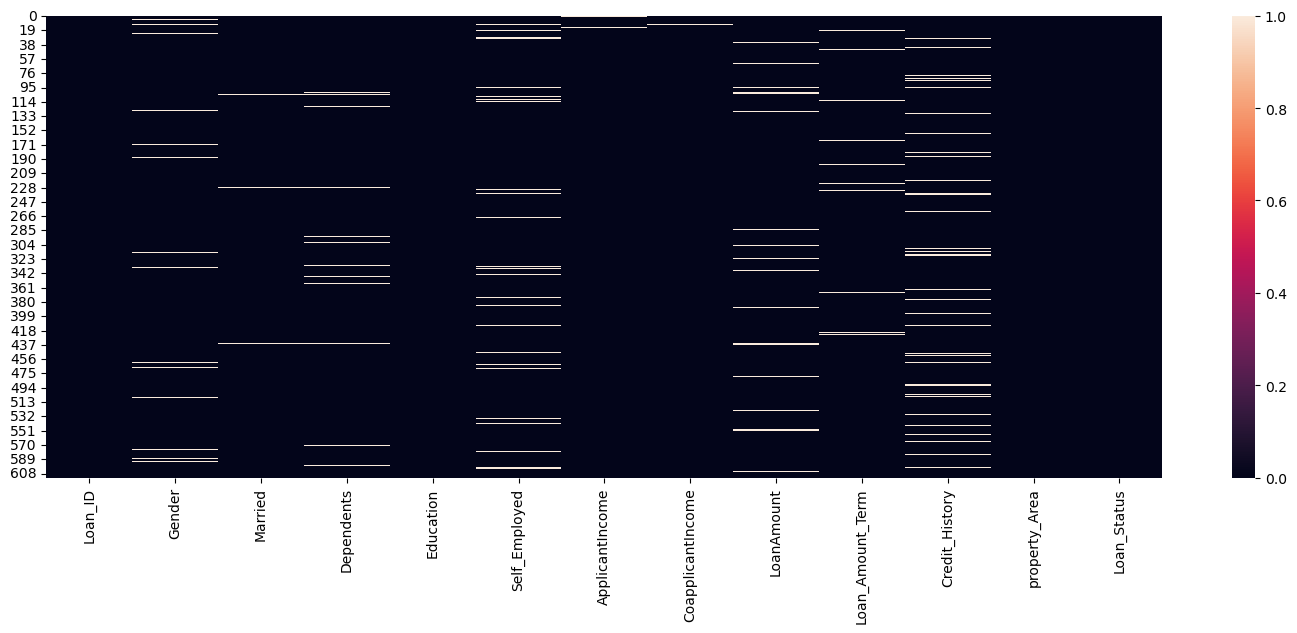

In [283]:
# Visualizing the missing values
fig = plt.figure(figsize=(18, 6))
sns.heatmap(df.isnull(),cbar=True) 

**Visualising the missing values in test dataset**

<Axes: >

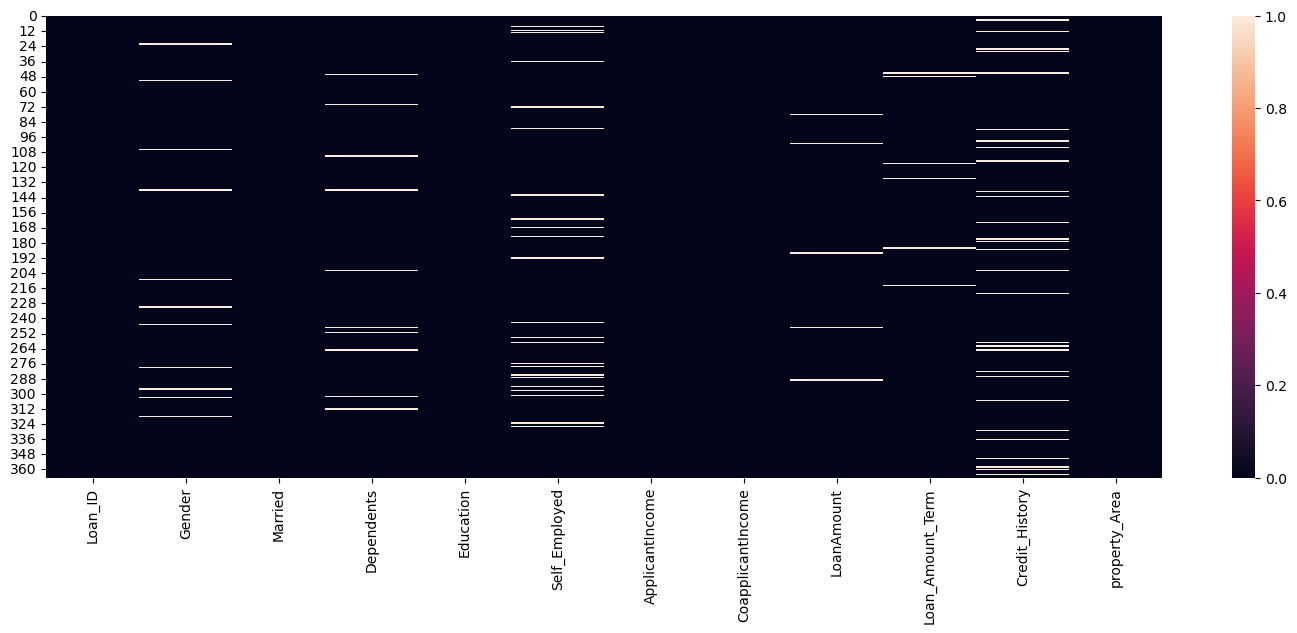

In [284]:
# Visualizing the missing values
fig = plt.figure(figsize=(18, 6))
sns.heatmap(dt.isnull(),cbar=True) 

**Dropping the column 'Loan ID' in both the datasets**

In [285]:
df=df.drop(columns='Loan_ID')
dt=dt.drop(columns='Loan_ID')

**Dividing the columns into categorical and numeric**

In [286]:
# Categorical data for train data (includes the column Loan_Status)
categorical_data = [i for i in df.columns if df[i].nunique()<=4]
categorical_data

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'property_Area',
 'Loan_Status']

In [287]:
# Categorical data for test data (excludes the column Loan_Status)
categorical_data_dt=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','property_Area']
categorical_data_dt

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'property_Area']

In [288]:
# Numerical data
numerical_data = [i for i in df.columns if i not in categorical_data]
numerical_data

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

**Understanding average values for all the numerical columns for each loan status category in the train dataset**

In [289]:
# Average applicant income for each loan status category
app_inc = df.groupby(['Loan_Status'])['ApplicantIncome'].mean().reset_index()
app_inc

,Loan_Status,ApplicantIncome
0,N,5450.596859
1,Y,5385.099762


In [290]:
# Average coapplicant income for each loan status category
coapp_inc = df.groupby(['Loan_Status'])['CoapplicantIncome'].mean().reset_index()
coapp_inc

,Loan_Status,CoapplicantIncome
0,N,1877.807292
1,Y,1503.719525


In [291]:
# Average loan amount for each loan status category
loan_amt = df.groupby(['Loan_Status'])['LoanAmount'].mean().reset_index()
loan_amt

,Loan_Status,LoanAmount
0,N,151.220994
1,Y,144.294404


In [292]:
# Average loan amount term for each loan status category
loan_amt_term = df.groupby(['Loan_Status'])['Loan_Amount_Term'].mean().reset_index()
loan_amt_term

,Loan_Status,Loan_Amount_Term
0,N,344.064516
1,Y,341.072464


**Distribution of Numerical Features in the Train Dataset**

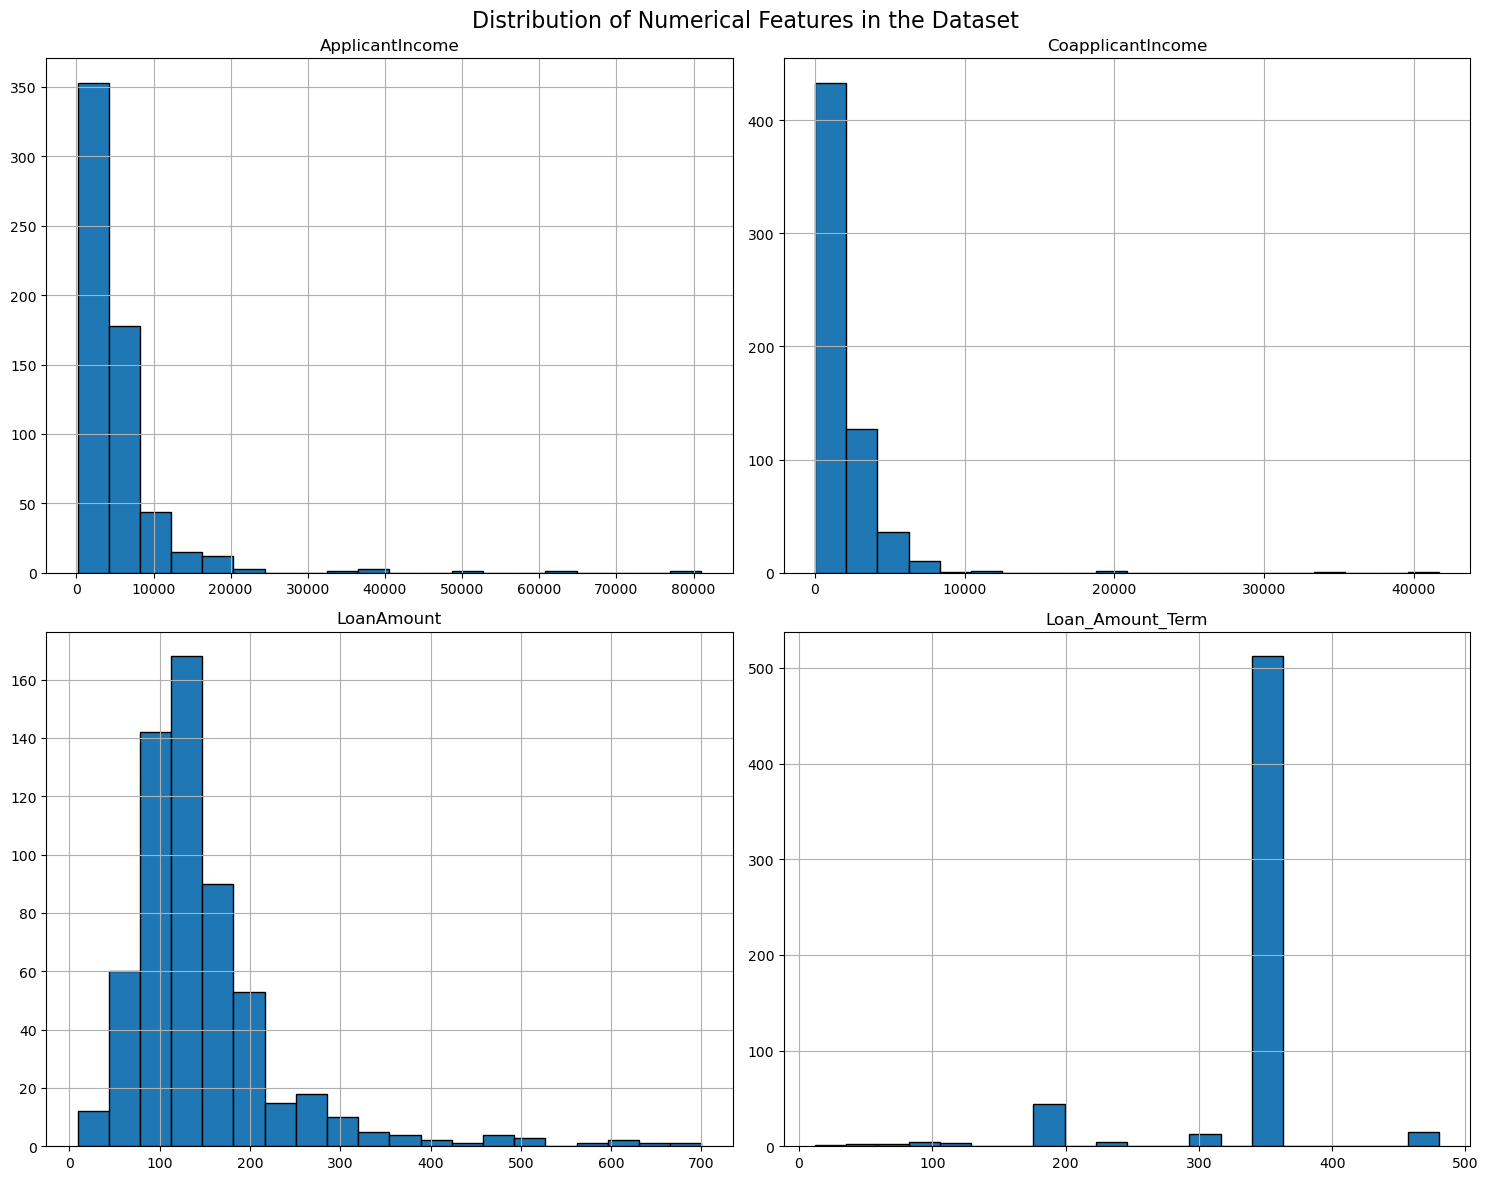

In [293]:
# Histograms to represent the all numerical features
df[numerical_data].hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features in the Dataset', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\Richa\AppData\Local\Temp\ipykernel_45108\1979757090.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Richa\AppData\Local\Temp\ipykernel_45108\1979757090.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Richa\AppData\Local\Temp\ipykernel_45108\19

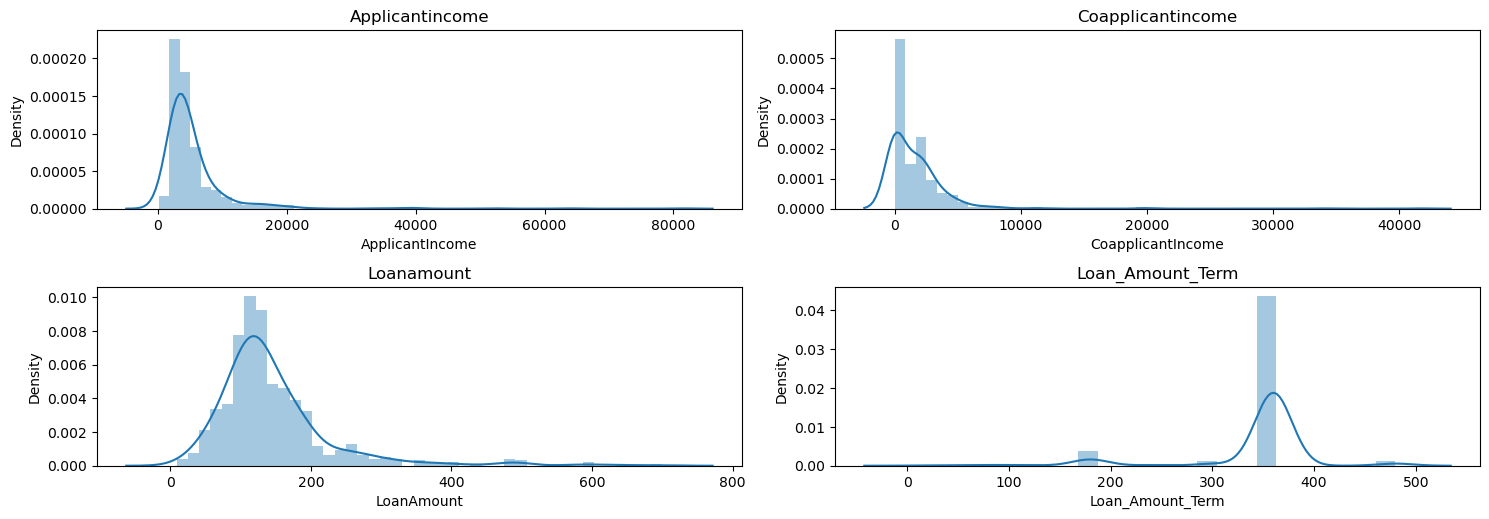

In [294]:
# Distplots to represent numerical columns
plt.figure(figsize=(15,10))
for n, col in enumerate(numerical_data[:]):
  plt.subplot(4, 2, n+1)  # 4 rows, 2 columns
  sns.distplot(df[col])
  plt.title(col.title())
  plt.tight_layout()


**Interpretation**

* ApplicantIncome - Highly right-skewed, most applicants have income below ₹10,000. A few applicants have extremely high incomes, which may be outliers.
* CoapplicantIncome - Right-skewed, many co-applicants have zero or very low income. This may imply they are not earning or not included in income consideration.
* LoanAmount - Slight right skew, but more balanced. Majority of loans are between ₹100,000–₹200,000. There are some large loan amounts that stretch the distribution.
* Loan_Amount_Term - Discrete distributions showing limited choices. Most loans are for 360 months (30 years). There are fewer shorter terms like 120, 180, or 240 months.

**Distribution of Categorical Features in the Train Dataset**

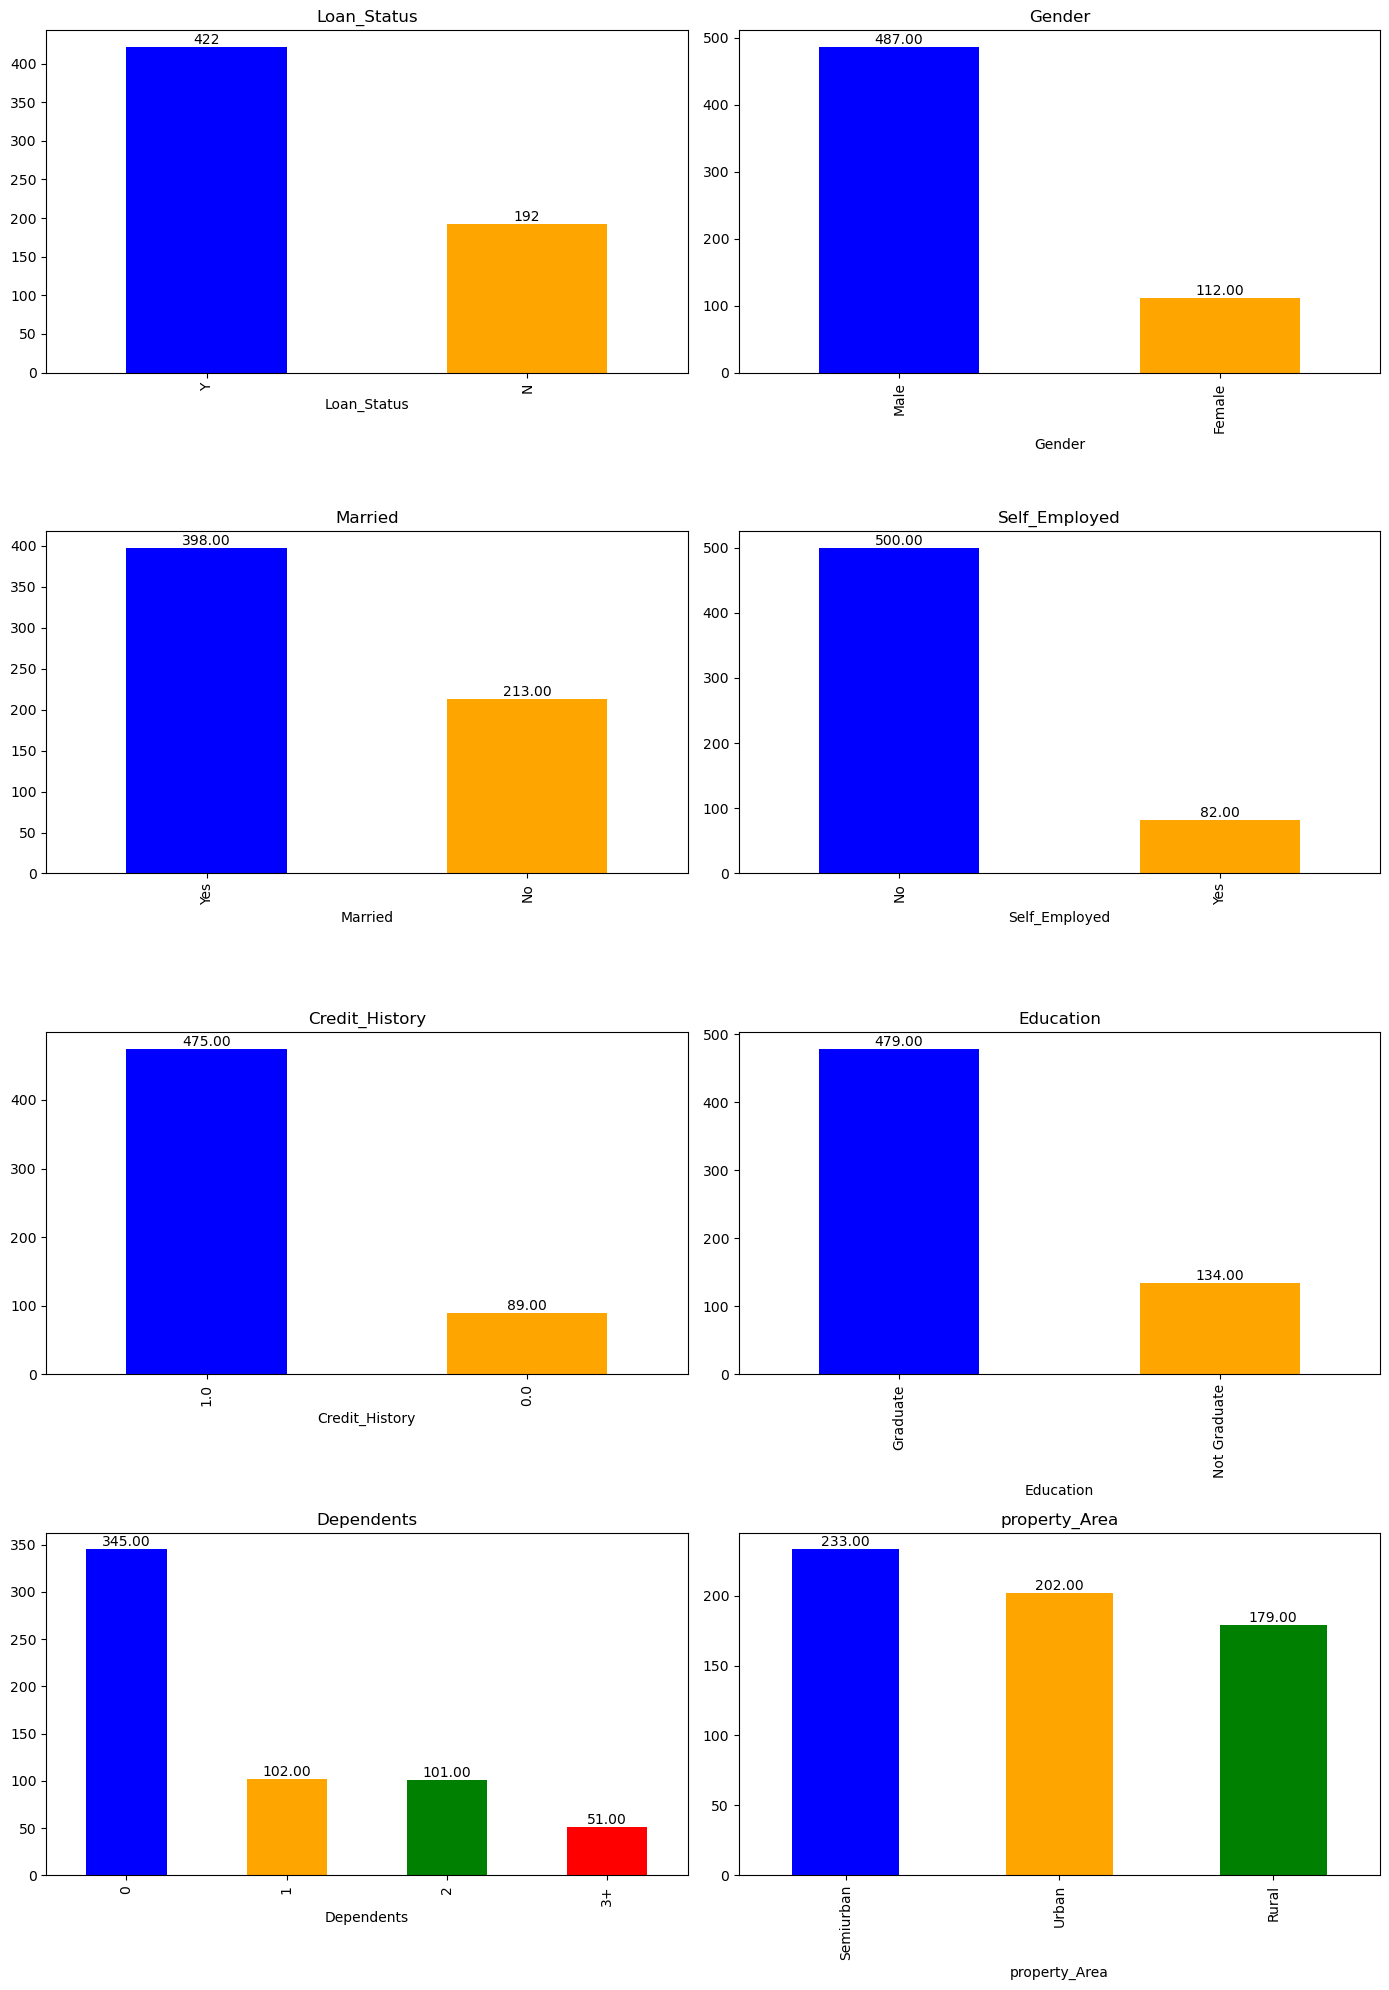

In [295]:
# Defining the colours to use
colors = ['blue', 'orange', 'green', 'red']

# Creating a figure with 8 subplots (4 rows, 2 columns)
fig, axs = plt.subplots(4, 2, figsize=(14, 20))  # 4 rows, 2 columns

# Plot 1: Loan_Status
ax = axs[0, 0]
df['Loan_Status'].value_counts().plot.bar(ax=ax, color=colors)
ax.set_title('Loan_Status')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

# Plot 2: Gender
ax = axs[0, 1]
df['Gender'].value_counts().plot.bar(ax=ax, color=colors)
ax.set_title('Gender')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

# Plot 3: Married
ax = axs[1, 0]
df['Married'].value_counts().plot.bar(ax=ax, color=colors)
ax.set_title('Married')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

# Plot 4: Self_Employed
ax = axs[1, 1]
df['Self_Employed'].value_counts().plot.bar(ax=ax, color=colors)
ax.set_title('Self_Employed')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

# Plot 5: Credit_History
ax = axs[2, 0]
df['Credit_History'].value_counts().plot.bar(ax=ax, color=colors)
ax.set_title('Credit_History')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

# Plot 6: Education
ax = axs[2, 1]
df['Education'].value_counts().plot.bar(ax=ax, color=colors)
ax.set_title('Education')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

# Plot 7: Dependents
ax = axs[3, 0]
df['Dependents'].value_counts().plot.bar(ax=ax, color=colors)
ax.set_title('Dependents')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

# Plot 8: property_Area
ax = axs[3, 1]
df['property_Area'].value_counts().plot.bar(ax=ax, color=colors)
ax.set_title('property_Area')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')
# Displaying the plots
plt.tight_layout()
plt.show()


**Interpretation**

* Loan_Status - Has 422 entries with loan approved as 'Y' and 192 entries as 'N'
* Gender - Has 487 entries with gender as 'Male' and 112 entries as 'Female'
* Married - Has 398 entries with loan married as 'Yes' and 213 entries as 'No'
* Self_Employed - Has 500 entries with self employed as 'Yes' and 82 entries as 'No'
* Credit_History - Has 475 entries with credit history as '1.0' and 89 entries as '0.0'
* Education - Has 479 entries with education as 'Graduate' and 134 entries as 'Not Graduate'
* Dependents - Has 345 entries with dependents as '0', 102 entries as '1', 101 entries as '2' and 51 entries as '3+'
* property_Area - Has 233 entries with property area as 'Semiurban', 202 entries as 'Urban' and 179 entries as 'Rural'


**Bivariate analysis between different categorical features and Loan_Status in the train dataset**

Each graph shows the breakdown of Loan_Status for each of the categorical variables, helping to identify trends or patterns based on the categorical features. The bars represent the count of applicants in each category, and the numbers on top of the bars show the exact counts.

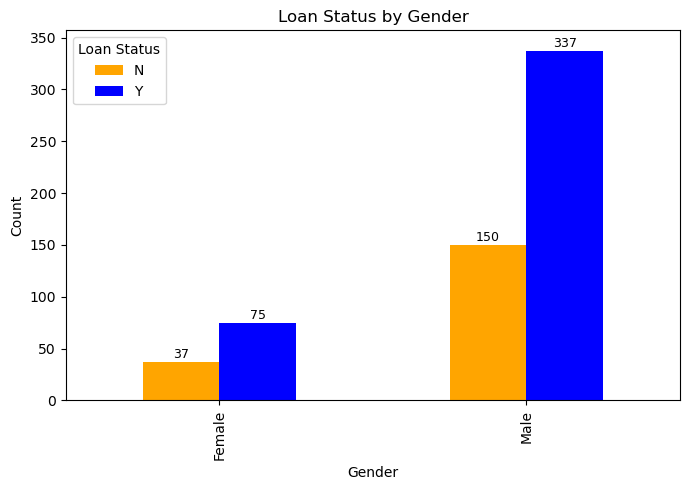

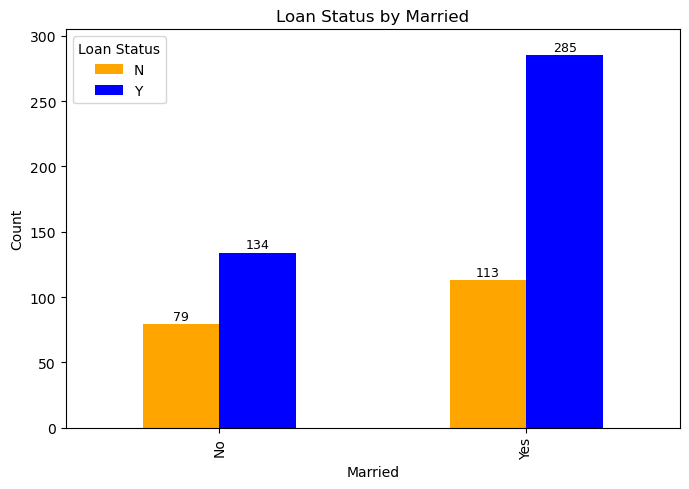

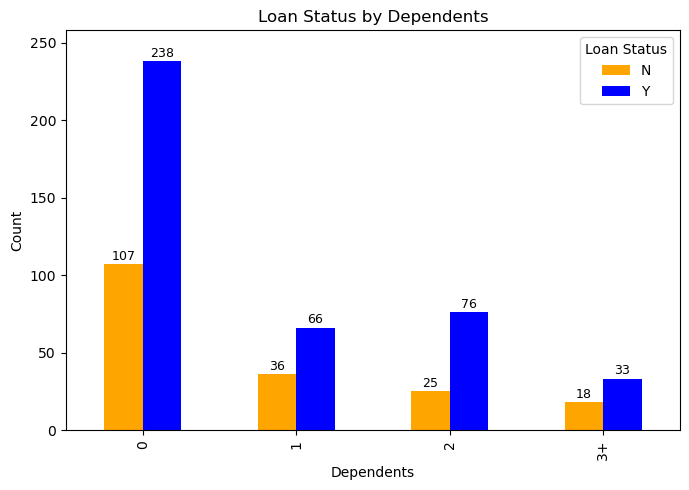

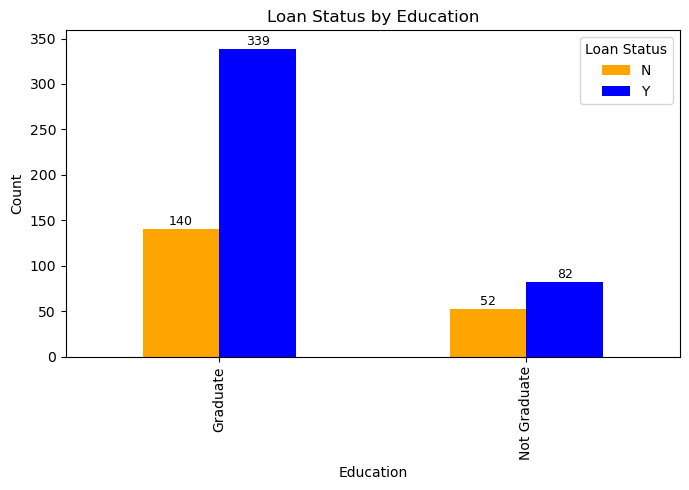

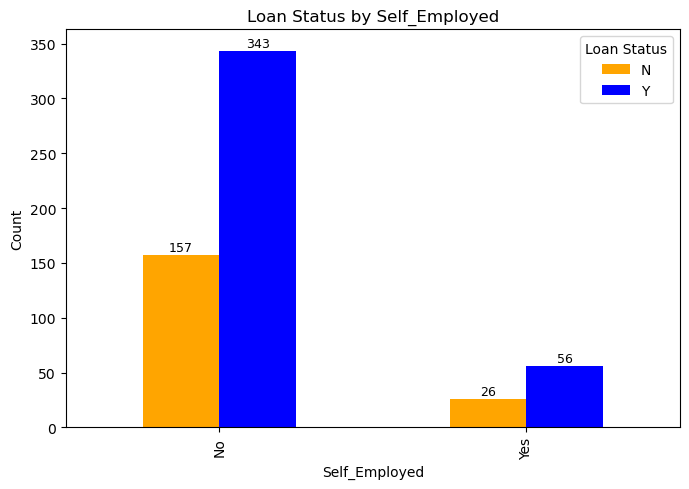

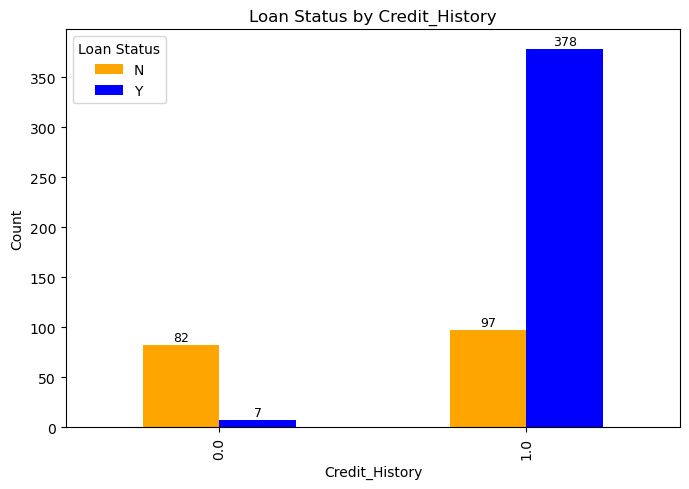

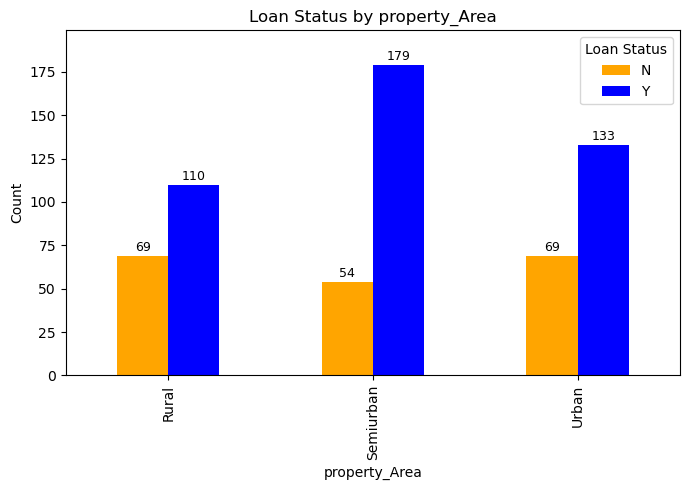

In [296]:
for col in categorical_data:
    if col != 'Loan_Status':  # Skip Loan_Status column
        cross_tab = pd.crosstab(df[col], df['Loan_Status'])

        # Plot side-by-side bars (not stacked)
        ax = cross_tab.plot(kind='bar', stacked=False, figsize=(7, 5), color=['orange', 'blue'])

        plt.title(f'Loan Status by {col}')
        plt.ylabel('Count')
        plt.ylim(0, cross_tab.values.max() + 20)

        # Add value labels on top of each bar
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.text(
                    p.get_x() + p.get_width() / 2., 
                    height + 1, 
                    f'{int(height)}', 
                    ha='center', va='bottom', fontsize=9
                )

        plt.legend(title='Loan Status')
        plt.tight_layout()
        plt.show()

**Converting Categorical Data to Numeric Codes**

In [297]:
# Encoding categorical data in train dataset
for col in categorical_data:
    df[col] = df[col].astype('category').cat.codes
df.replace(-1, np.nan, inplace=True)

In [298]:
# Encoding categorical data in train dataset
for col in categorical_data_dt:
    dt[col] = dt[col].astype('category').cat.codes
dt.replace(-1, np.nan, inplace=True)

**Bivariate analysis between different numerical features and Loan_Status in the train dataset**

The regression plots display how each numerical feature correlates with the Loan_Status. Since Loan_Status is binary (1 for loan approval and 0 for loan denial), the graphs reveal loan approval probability trends(increase or decrease) and presence of outliers.

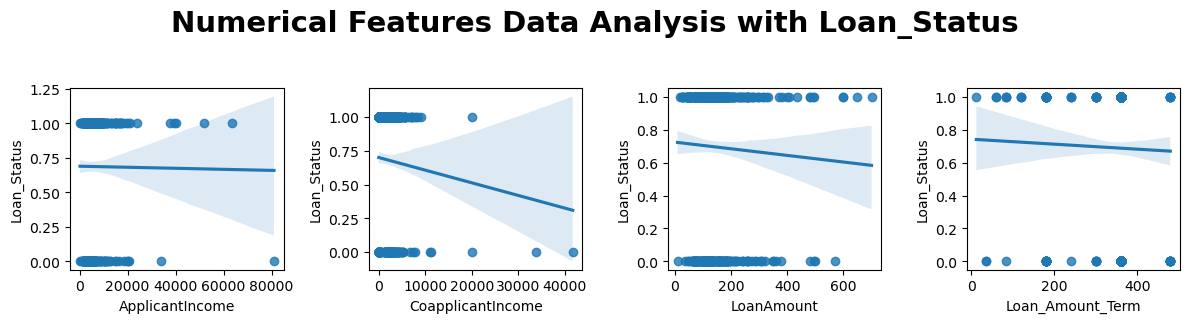

In [299]:
plt.figure(figsize=(12,5))

plt.suptitle('Numerical Features Data Analysis with Loan_Status', fontsize=21, fontweight='bold', y=1.03)

for i,col in enumerate(numerical_data):
  plt.subplot(2, 4, i+1) # Subplots of 2 rows and 4 columns

  # Regression plots
  sns.regplot(x=df[col], y='Loan_Status', data=df)
  
  plt.xlabel(col)
  plt.tight_layout()

**Pairplots between all the Numerical Features in the train dataset**

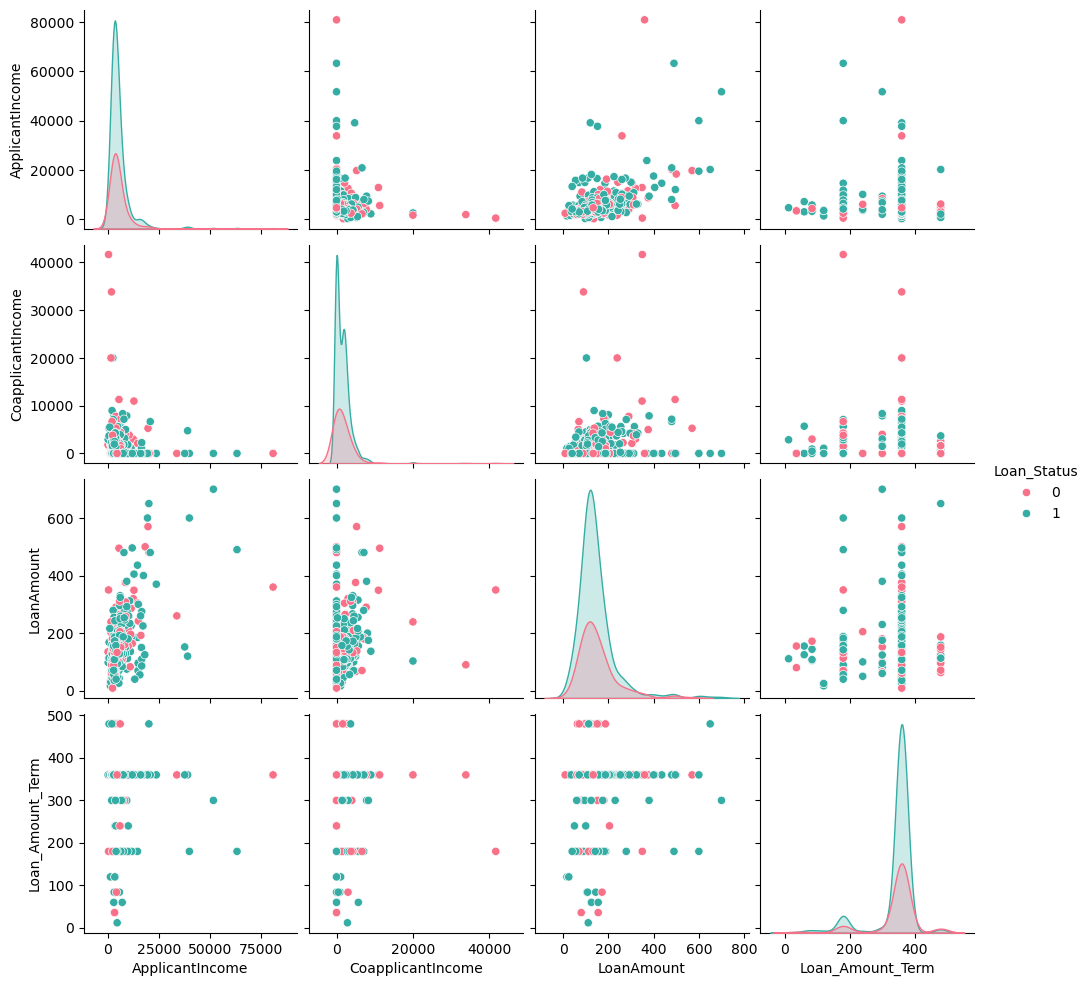

In [300]:
# PairPlot
sns.pairplot(df[numerical_data + ['Loan_Status']], hue='Loan_Status', palette='husl')
plt.show()

**Correlation between all the features**

<Axes: >

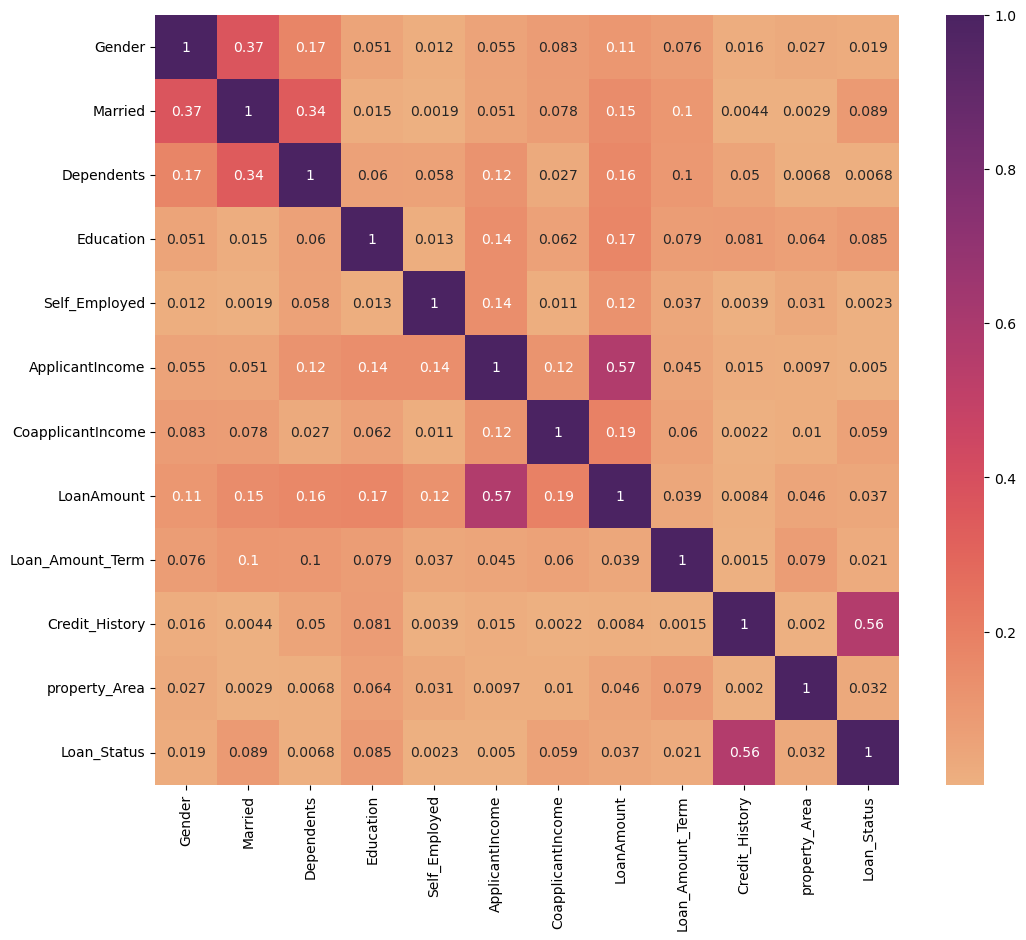

In [301]:
# Calculating the correlation
plt.figure(figsize = (12,10))
corr = df.corr()
sns.heatmap(abs(corr), annot=True, cmap = 'flare')

**Correlation of all the features with Loan_Status**

In [302]:
# Correlation of all features with 'Loan_Status' and sort them in descending order
loan_status_corr = corr['Loan_Status'].sort_values(ascending=False)
loan_status_corr

Loan_Status          1.000000
Credit_History       0.561678
Married              0.089280
property_Area        0.032112
Gender               0.018804
Dependents           0.006781
Self_Employed       -0.002303
ApplicantIncome     -0.004964
Loan_Amount_Term    -0.021268
LoanAmount          -0.037318
CoapplicantIncome   -0.059292
Education           -0.085354
Name: Loan_Status, dtype: float64

## Data Preprocessing

**Filling null values in categorical columns with most frequent observation**

In [303]:
#Filling the null values of categorical columns in train dataset
for col in categorical_data:
    df[col].fillna(df[col].mode()[0], inplace=True)

#Filling the null values in test dataset
for col in categorical_data_dt:
    dt[col].fillna(dt[col].mode()[0], inplace=True)

C:\Users\Richa\AppData\Local\Temp\ipykernel_45108\3291021275.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Richa\AppData\Local\Temp\ipykernel_45108\3291021275.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

**Filling null values in numerical columns with the median value**

In [304]:
#Filling the null values of numerical columns in train dataset
for col in numerical_data:
    df[col].fillna(df[col].median(), inplace=True)

#Filling the null values of numerical columns in test dataset
for col in numerical_data:
    dt[col].fillna(dt[col].median(), inplace=True)

#Filling in Credit_History with most frequent observation only in test data (can't be a median value) as it was encoded for in train data
dt['Credit_History'].fillna(dt['Credit_History'].mode()[0], inplace=True)

C:\Users\Richa\AppData\Local\Temp\ipykernel_45108\4045627425.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Richa\AppData\Local\Temp\ipykernel_45108\4045627425.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

**Checking for null values in train data**

In [305]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
dtype: int64

**Checking for null values in test data**

In [306]:
dt.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
dtype: int64

**Checking for outliers in train data using boxplots**

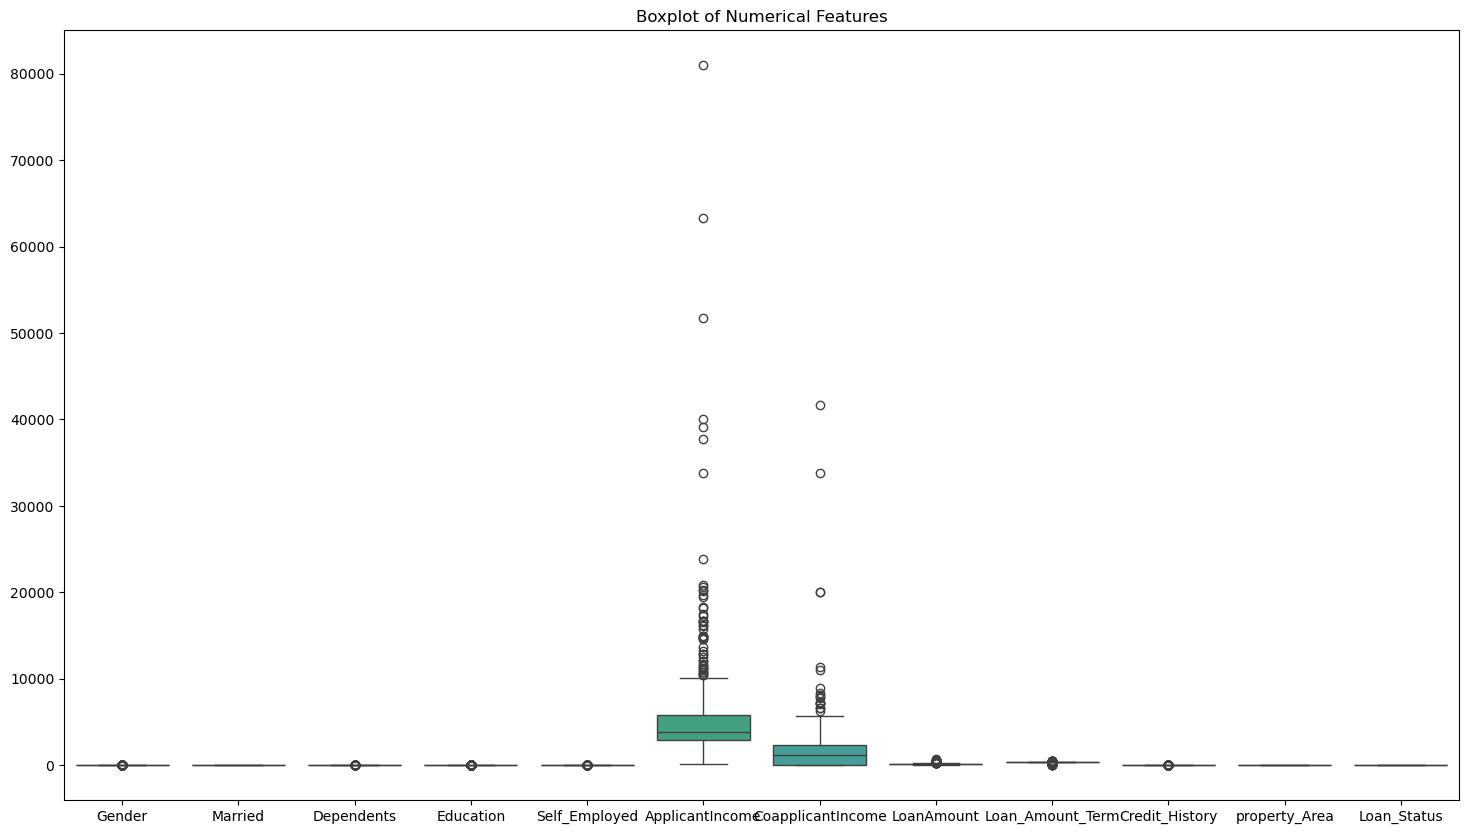

Number of outliers for each column:
Gender: 112 outliers
Married: 0 outliers
Dependents: 51 outliers
Education: 134 outliers
Self_Employed: 82 outliers
ApplicantIncome: 50 outliers
CoapplicantIncome: 18 outliers
LoanAmount: 41 outliers
Loan_Amount_Term: 88 outliers
Credit_History: 89 outliers


In [307]:
# Calculate IQR and detect outliers for each column
outlier_counts = {}

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_counts[col] = outliers

# Plot the boxplot
plt.figure(figsize=(18, 10))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.show()

# Print the number of outliers for each column
print("Number of outliers for each column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")


**Individual Boxplots for numerical data**

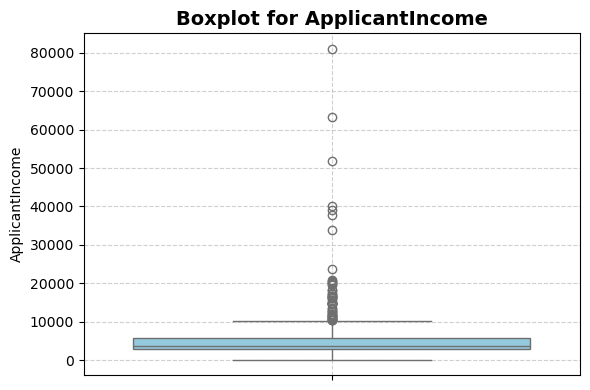

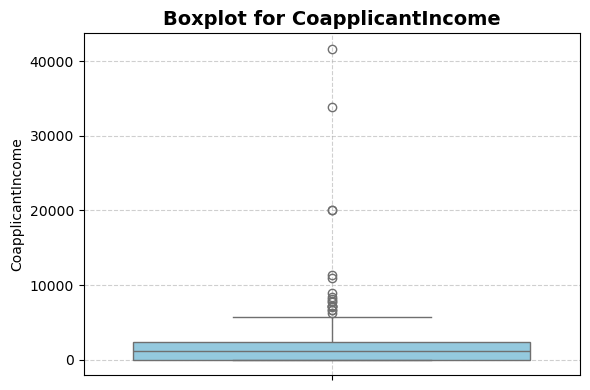

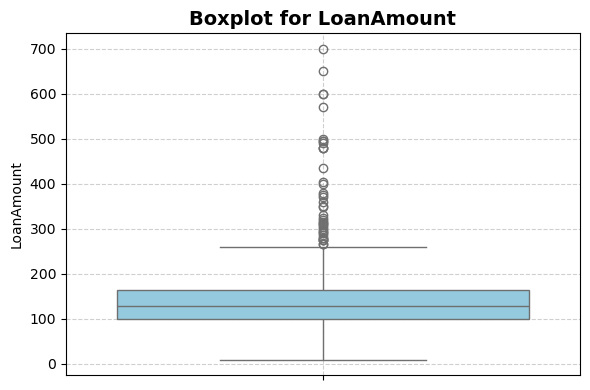

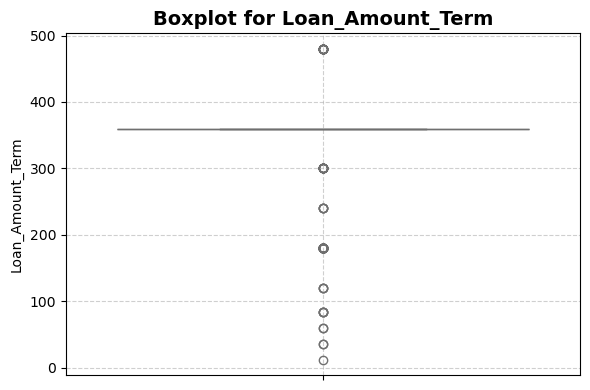

In [308]:
# Boxplots for numerical data
for col in numerical_data:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot for {col}', fontsize=14, fontweight='bold')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


**Dealing with outliers in numerical data by capping**:  Replacing values lower than the 1st percentile with the 1st percentile value and higher than the 99th percentile with the 99th percentile value, effectively removing extreme values.

In [309]:
def cap_outliers(df, col, lower_quantile=0.1, upper_quantile=0.9):
    lower_bound = df[col].quantile(lower_quantile)
    upper_bound = df[col].quantile(upper_quantile)
    
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df
for col in numerical_data:
     df = cap_outliers(df, col)

**Outliers after capping for numerical data in train data**

In [310]:
# Function to calculate the number of outliers for each numerical column
def count_outliers(df, col):
    # Define lower and upper bounds for outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

    # Count the number of outliers (values outside the lower and upper bounds)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return len(outliers)

# Calculate outliers for each numerical column
print("Number of outliers for each numerical column:")
for col in numerical_data:
    outlier_count = count_outliers(df, col)
    print(f"{col}: {outlier_count} outliers")


Number of outliers for each numerical column:
ApplicantIncome: 0 outliers
CoapplicantIncome: 0 outliers
LoanAmount: 0 outliers
Loan_Amount_Term: 73 outliers


Outliers still present in Loan_Amount_Term as it is not an evenly distributed data having most of its entries as distinct values like 360 folowed by 240,180,etc.

**Boxplots after capping the outliers of numerical data in train dataset**

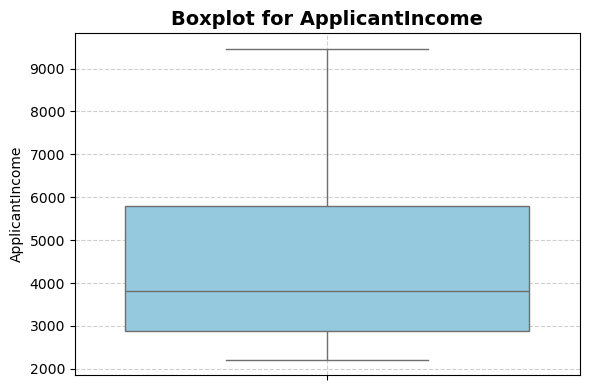

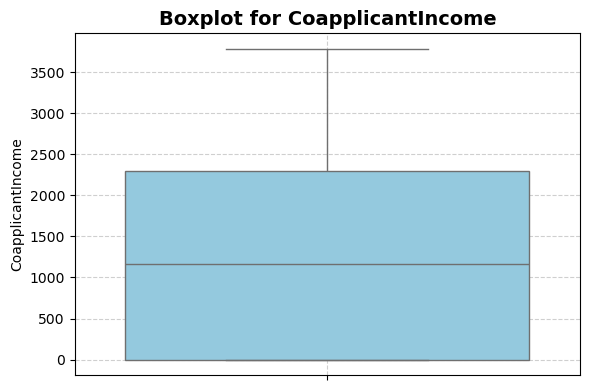

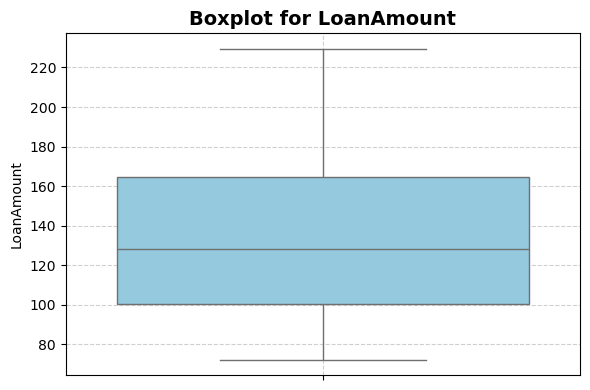

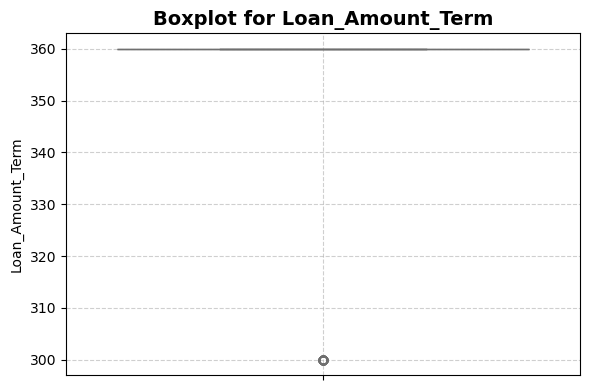

In [311]:
# Boxplots for numerical data
for col in numerical_data:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot for {col}', fontsize=14, fontweight='bold')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

**Handling rear categories so as to avoid issues caused by too many unique values with low frequencies**

In [312]:
# Define a threshold for category frequency (e.g., 5% of the data)
threshold = 0.05
for col in categorical_data:
    category_counts = df[col].value_counts(normalize=True)  # Calculate frequency distribution
    rare_categories = category_counts[category_counts < threshold].index  # Find rare categories
    
    # Replace rare categories with 'Other'
    df[col] = df[col].replace(rare_categories, 'Other')

**Analysing the dataframes**

In [313]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1.0,1.0,1.0,0.0,0.0,3806.0,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,72.3,360.0,1.0,2,1
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2,1


Here, all the categorical columns have been encoded. The column 'property_Area' has values 0,1 and 2. One hot encoding is performed on this to form columns - Urban, Semiurban and Rural

## Feature Engineering

**One hot encoding on train dataset**

In [314]:
df['property_Area_str'] = df['property_Area'].map({0: 'Urban', 1: 'Rural', 2: 'Semiurban'})

# One-hot encode the string versions, keep original, and convert True/False to int
df_ohe = pd.get_dummies(df[['property_Area_str']], prefix=['property_Area'])
df_ohe = df_ohe.astype(int)  # Convert True/False to 1/0

# Join the one-hot encoded columns back
df = pd.concat([df, df_ohe], axis=1)

In [315]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,property_Area_str,property_Area_Rural,property_Area_Semiurban,property_Area_Urban
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,128.0,360.0,1.0,2,1,Semiurban,0,1,0
1,1.0,1.0,1.0,0.0,0.0,3806.0,1508.0,128.0,360.0,1.0,0,0,Urban,0,0,1
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,72.3,360.0,1.0,2,1,Semiurban,0,1,0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2,1,Semiurban,0,1,0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2,1,Semiurban,0,1,0


**One hot encoding on test dataset**

In [316]:
dt['property_Area_str'] = dt['property_Area'].map({0: 'Urban', 1: 'Rural', 2: 'Semiurban'})

dt_ohe = pd.get_dummies(dt[['property_Area_str']], prefix=['property_Area'])
dt_ohe = dt_ohe.astype(int)

dt = pd.concat([dt, dt_ohe], axis=1)

In [317]:
dt.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,property_Area_str,property_Area_Rural,property_Area_Semiurban,property_Area_Urban
0,1.0,1,0.0,0,0.0,5720,0,110.0,360.0,1.0,2,Semiurban,0,1,0
1,1.0,1,1.0,0,0.0,3076,1500,126.0,360.0,1.0,2,Semiurban,0,1,0
2,1.0,1,2.0,0,0.0,5000,1800,208.0,360.0,1.0,2,Semiurban,0,1,0
3,1.0,1,2.0,0,0.0,2340,2546,100.0,360.0,1.0,2,Semiurban,0,1,0
4,1.0,0,0.0,1,0.0,3276,0,78.0,360.0,1.0,2,Semiurban,0,1,0


**Removing the str columns from the train and test dataframes**

In [318]:
df=df.drop(columns=["property_Area_str"])
dt=dt.drop(columns=["property_Area_str"])

**Computing correlation between all features**

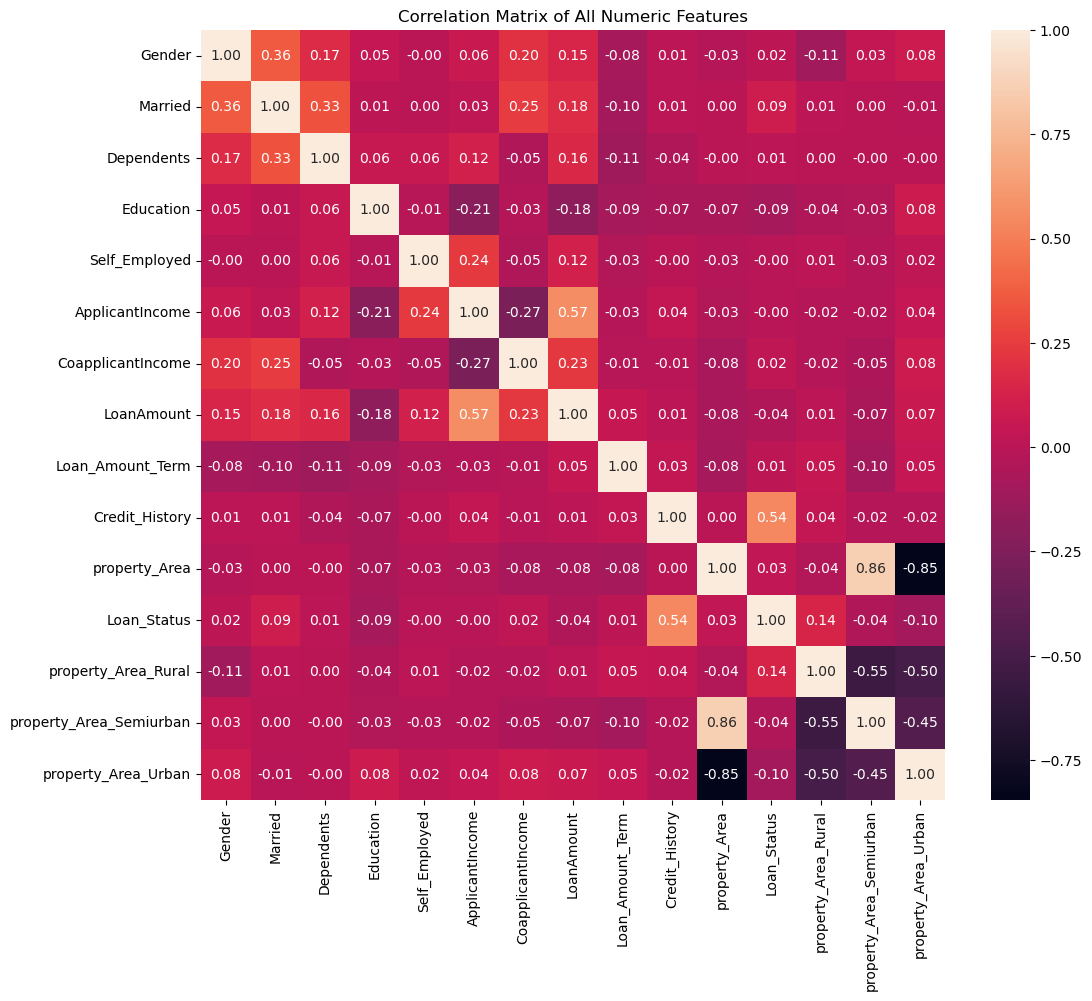

In [319]:
corr_matrix=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt=".2f")
plt.title("Correlation Matrix of All Numeric Features")
plt.show()

**Computing correlation between the target Loan_Status and all columns**

In [320]:
loan_status_corr = corr_matrix['Loan_Status'].sort_values(ascending=False)
loan_status_corr

Loan_Status                1.000000
Credit_History             0.540556
property_Area_Rural        0.136540
Married                    0.091478
property_Area              0.032112
CoapplicantIncome          0.021339
Gender                     0.017987
Loan_Amount_Term           0.012728
Dependents                 0.010118
ApplicantIncome           -0.002620
Self_Employed             -0.003700
LoanAmount                -0.039927
property_Area_Semiurban   -0.043621
Education                 -0.085884
property_Area_Urban       -0.100694
Name: Loan_Status, dtype: float64

**Removing 'property_Area' col from both train and test dataset as it has negligible correlation(lesser than its one hot encoded columns)**

In [321]:
df=df.drop(columns=["property_Area"])
dt=dt.drop(columns=["property_Area"])

**Adding new features like Total Income, Loan to Income Ratio, EMI and Balance Income to both the train and test dataframes**

In [322]:
#Feature Engineering on train dataframe
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Loan_Income_Ratio'] = df['LoanAmount'] / df['Total_Income']
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']
df['Balance_Income'] = df['Total_Income'] - df['EMI']

In [323]:
#Feature Engineering on test dataframe
dt['Total_Income'] = dt['ApplicantIncome'] + dt['CoapplicantIncome']
dt['Loan_Income_Ratio'] = dt['LoanAmount'] / dt['Total_Income']
dt['EMI'] = dt['LoanAmount'] / dt['Loan_Amount_Term']
dt['Balance_Income'] = dt['Total_Income'] - dt['EMI']

**Correlation calculation after adding new columns**

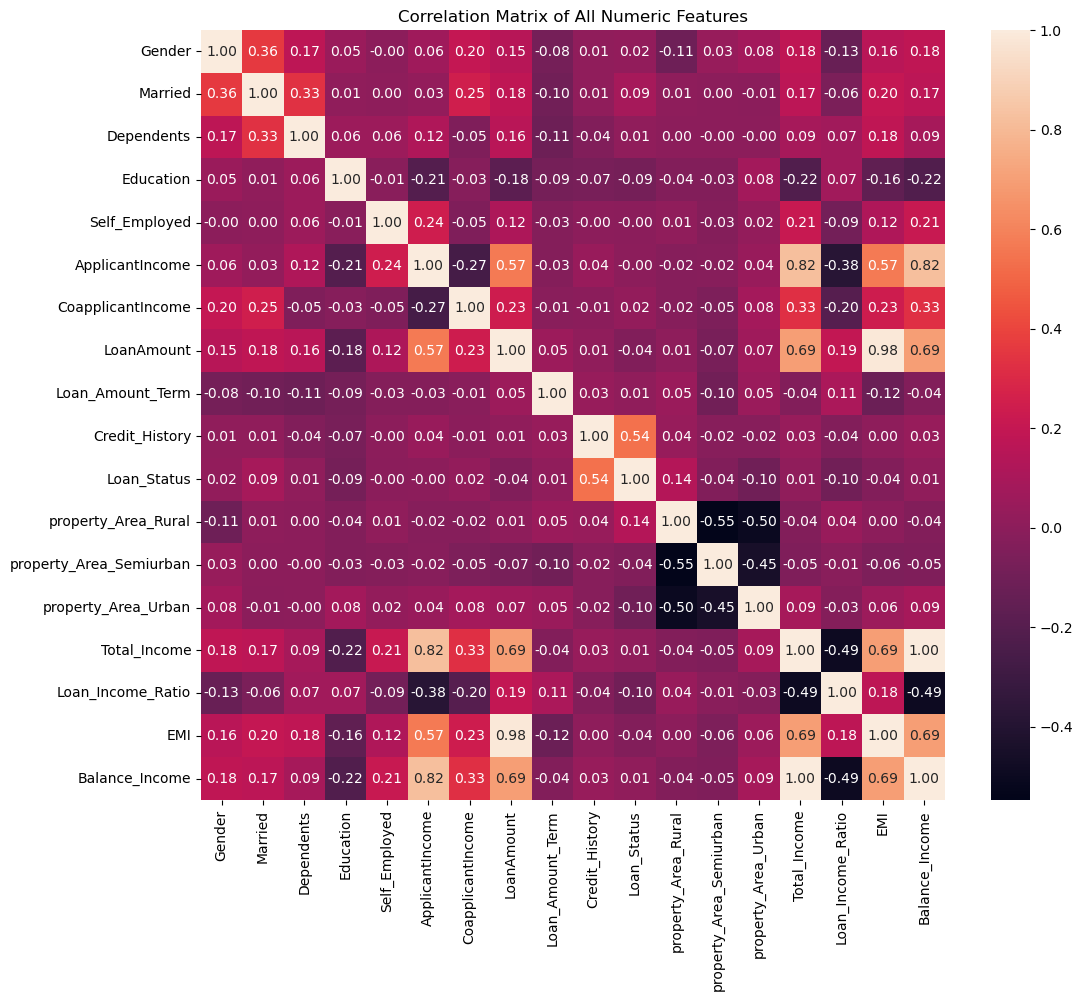

In [324]:
corr_matrix=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt=".2f")
plt.title("Correlation Matrix of All Numeric Features")
plt.show()

**Correlation of all columns with Loan_Status after adding new columns**

In [325]:
loan_status_corr = corr_matrix['Loan_Status'].sort_values(ascending=False)
loan_status_corr

Loan_Status                1.000000
Credit_History             0.540556
property_Area_Rural        0.136540
Married                    0.091478
CoapplicantIncome          0.021339
Gender                     0.017987
Loan_Amount_Term           0.012728
Dependents                 0.010118
Balance_Income             0.009999
Total_Income               0.009996
ApplicantIncome           -0.002620
Self_Employed             -0.003700
EMI                       -0.039743
LoanAmount                -0.039927
property_Area_Semiurban   -0.043621
Education                 -0.085884
Loan_Income_Ratio         -0.099789
property_Area_Urban       -0.100694
Name: Loan_Status, dtype: float64

**Saving the preprocessed train and test datframes to csv files**

In [326]:
# Train dataframe saved as 'training_preprocessed.csv'
df.to_csv('training_preprocessed.csv', index=False)

# Train dataframe saved as 'testing_preprocessed.csv'
dt.to_csv('testing_preprocessed.csv', index=False)

## *CLASSIFICATION*

**Looading the preprocessed train and test datasets**

In [327]:
df_cl=pd.read_csv('training_preprocessed.csv')
dt_cl=pd.read_csv('testing_preprocessed.csv')

In [328]:
df_cl.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,property_Area_Rural,property_Area_Semiurban,property_Area_Urban,Total_Income,Loan_Income_Ratio,EMI,Balance_Income
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,128.0,360.0,1.0,1,0,1,0,5849.0,0.021884,0.355556,5848.644444
1,1.0,1.0,1.0,0.0,0.0,3806.0,1508.0,128.0,360.0,1.0,0,0,0,1,5314.0,0.024087,0.355556,5313.644444
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,72.3,360.0,1.0,1,0,1,0,3000.0,0.024100,0.200833,2999.799167
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1,0,1,0,4941.0,0.024287,0.333333,4940.666667
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,1,0,1,0,6000.0,0.023500,0.391667,5999.608333


In [329]:
dt_cl.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area_Rural,property_Area_Semiurban,property_Area_Urban,Total_Income,Loan_Income_Ratio,EMI,Balance_Income
0,1.0,1,0.0,0,0.0,5720,0,110.0,360.0,1.0,0,1,0,5720,0.019231,0.305556,5719.694444
1,1.0,1,1.0,0,0.0,3076,1500,126.0,360.0,1.0,0,1,0,4576,0.027535,0.350000,4575.650000
2,1.0,1,2.0,0,0.0,5000,1800,208.0,360.0,1.0,0,1,0,6800,0.030588,0.577778,6799.422222
3,1.0,1,2.0,0,0.0,2340,2546,100.0,360.0,1.0,0,1,0,4886,0.020467,0.277778,4885.722222
4,1.0,0,0.0,1,0.0,3276,0,78.0,360.0,1.0,0,1,0,3276,0.023810,0.216667,3275.783333


**Splitting the train data into training and validation sets**

In [330]:
df_cl_train,df_cl_val=train_test_split(df_cl,test_size=0.25,random_state=42)

In [331]:
y_cl_train=df_cl_train["Loan_Status"]
x_cl_train=df_cl_train.drop(columns="Loan_Status")

In [332]:
y_cl_val=df_cl_val["Loan_Status"]
x_cl_val=df_cl_val.drop(columns="Loan_Status")

## Model - Random Forest

**Import the necessary modules**

In [333]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

**Training the data**

In [334]:
rf = RandomForestClassifier(n_estimators=80, random_state=42)
rf.fit(x_cl_train, y_cl_train)

RandomForestClassifier(n_estimators=80, random_state=42)

**Making predictions on the validation data**

In [335]:
y_cl_val_pred = rf.predict(x_cl_val)

**Metrics for the evaluation of the model performance on validation data**

In [336]:
cm = confusion_matrix(y_cl_val, y_cl_val_pred)
acc = accuracy_score(y_cl_val, y_cl_val_pred)
precision = precision_score(y_cl_val, y_cl_val_pred)
recall = recall_score(y_cl_val, y_cl_val_pred)
f1 = f1_score(y_cl_val, y_cl_val_pred)

Confusion Matrix:


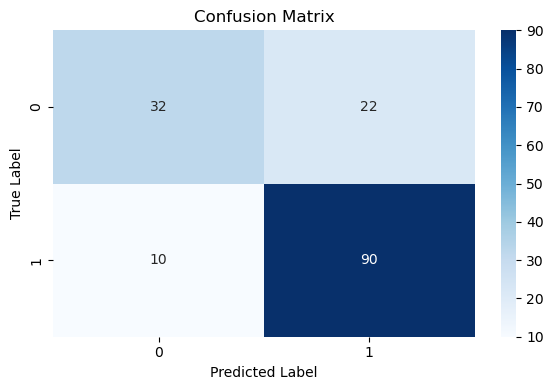

Accuracy: 0.7922, Precision: 0.8036, Recall: 0.9000, F1-score: 0.8491



In [337]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Confusion Matrix:")
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

**Making predictions on test dataset**

In [338]:
y_cl_test_pred = rf.predict(dt_cl)

**Printing the Predictions**

In [339]:
y_cl_test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

**Saving the classification predictions to a new submissions csv file**

In [340]:
#Adding predictions as a new column
dt_cl['Loan_Status'] = y_cl_test_pred

#Saving to a new CSV file
dt_cl.to_csv('final_submission_classification.csv', index=False)


## *REGRESSION TASK 1*

**Loading the datasets**

In [341]:
df_rg1=pd.read_csv("training_preprocessed.csv")
dt_rg1=pd.read_csv("final_submission_classification.csv")

In [342]:
df_rg1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,property_Area_Rural,property_Area_Semiurban,property_Area_Urban,Total_Income,Loan_Income_Ratio,EMI,Balance_Income
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,128.0,360.0,1.0,1,0,1,0,5849.0,0.021884,0.355556,5848.644444
1,1.0,1.0,1.0,0.0,0.0,3806.0,1508.0,128.0,360.0,1.0,0,0,0,1,5314.0,0.024087,0.355556,5313.644444
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,72.3,360.0,1.0,1,0,1,0,3000.0,0.024100,0.200833,2999.799167
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1,0,1,0,4941.0,0.024287,0.333333,4940.666667
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,1,0,1,0,6000.0,0.023500,0.391667,5999.608333


In [343]:
dt_rg1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area_Rural,property_Area_Semiurban,property_Area_Urban,Total_Income,Loan_Income_Ratio,EMI,Balance_Income,Loan_Status
0,1.0,1,0.0,0,0.0,5720,0,110.0,360.0,1.0,0,1,0,5720,0.019231,0.305556,5719.694444,1
1,1.0,1,1.0,0,0.0,3076,1500,126.0,360.0,1.0,0,1,0,4576,0.027535,0.350000,4575.650000,1
2,1.0,1,2.0,0,0.0,5000,1800,208.0,360.0,1.0,0,1,0,6800,0.030588,0.577778,6799.422222,1
3,1.0,1,2.0,0,0.0,2340,2546,100.0,360.0,1.0,0,1,0,4886,0.020467,0.277778,4885.722222,1
4,1.0,0,0.0,1,0.0,3276,0,78.0,360.0,1.0,0,1,0,3276,0.023810,0.216667,3275.783333,1


**Splitting the train data into training and validation sets**

In [344]:
df_rg1_train,df_rg1_val=train_test_split(df_rg1,test_size=0.2,random_state=42)

In [345]:
y_rg1_train = df_rg1_train[df_rg1_train['Loan_Status']==1]['LoanAmount']
x_rg1_train = df_rg1_train[df_rg1_train['Loan_Status']==1].drop(columns=['LoanAmount','Loan_Status'])

y_rg1_val = df_rg1_val[df_rg1_val['Loan_Status']==1]['LoanAmount']
x_rg1_val = df_rg1_val[df_rg1_val['Loan_Status']==1].drop(columns=['LoanAmount','Loan_Status'])

## Model - Gradient Boosting

**Import the necessary modules**

In [346]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

**Train the model on the training data**

In [347]:
model = GradientBoostingRegressor()
model.fit(x_rg1_train, y_rg1_train)

GradientBoostingRegressor()

**Predictions on validation data**

In [348]:
y_val_rg1_predict = model.predict(x_rg1_val)

**Metrics for evaluation of predictions made on validation data**

In [349]:
rmse = sqrt(mean_squared_error(y_rg1_val, y_val_rg1_predict))
mae = mean_absolute_error(y_rg1_val, y_val_rg1_predict)
r2 = r2_score(y_rg1_val, y_val_rg1_predict)
mean_value = y_rg1_val.mean()
rmse_percentage = (rmse / mean_value) * 100

print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'R2: {r2:.3f}')
print(f'RMSE (percentage): {rmse_percentage:.2f}%') 

RMSE: 1.925
MAE: 1.138
R2: 0.998
RMSE (percentage): 1.50%


**Predictions on the test dataset**

In [350]:
dt_y_rg1 = dt_rg1[dt_rg1['Loan_Status']==0]['LoanAmount']
dt_x_rg1 = dt_rg1[dt_rg1['Loan_Status']==0].drop(columns=['LoanAmount','Loan_Status'])

In [351]:
y_test_rg1_predict = model.predict(dt_x_rg1)

**Printing the Predictions**

In [352]:
y_test_rg1_predict

array([145.58629959, 163.83025104, 166.66201549, 145.30751511,
       178.35454937, 130.16253767, 178.10680732, 185.92067678,
       106.17811896, 132.75716566, 130.1152398 , 186.82494352,
       230.93773211, 161.77375538, 112.17066283, 227.58828254,
       200.0715748 , 122.0945785 ,  88.02652099,  89.26129239,
       200.91510023, 118.00145508, 183.89423046,  79.16324165,
       103.98205357, 214.53935576,  72.48311882, 186.90748545,
       241.3618167 ,  71.76573364, 131.87119272, 148.138811  ,
       139.81815418, 201.27010666, 117.03161559,  80.99218926,
        72.71985299, 170.35372316, 120.82779452,  94.33622075,
        80.35494031, 228.20263471, 109.20796265,  72.79941383,
       179.99082154, 127.84681502, 113.14068112, 103.57484449,
        72.56409148, 200.89670313, 185.94583841, 124.22256014,
       181.47498527, 117.82929372, 103.340701  , 124.48788745,
       227.94161629,  72.52911208, 106.06439149, 123.99733413,
        81.04781568, 226.43329877, 184.88583586,  81.06

**Saving the predictions to a new submission file**

In [353]:
#Adding predictions as a new column
dt_x_rg1['LoanAmount'] = y_test_rg1_predict

#Saving to a new CSV file
dt_x_rg1.to_csv('final_submission_regression1.csv', index=False)

## *REGRESSION TASK 2*

**Loading the datasets**

In [367]:
df_rg2=pd.read_csv("training_preprocessed.csv")
dt_rg2=pd.read_csv("final_submission_classification.csv")

In [368]:
df_rg2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,property_Area_Rural,property_Area_Semiurban,property_Area_Urban,Total_Income,Loan_Income_Ratio,EMI,Balance_Income
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,128.0,360.0,1.0,1,0,1,0,5849.0,0.021884,0.355556,5848.644444
1,1.0,1.0,1.0,0.0,0.0,3806.0,1508.0,128.0,360.0,1.0,0,0,0,1,5314.0,0.024087,0.355556,5313.644444
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,72.3,360.0,1.0,1,0,1,0,3000.0,0.024100,0.200833,2999.799167
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1,0,1,0,4941.0,0.024287,0.333333,4940.666667
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,1,0,1,0,6000.0,0.023500,0.391667,5999.608333


In [369]:
dt_rg2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area_Rural,property_Area_Semiurban,property_Area_Urban,Total_Income,Loan_Income_Ratio,EMI,Balance_Income,Loan_Status
0,1.0,1,0.0,0,0.0,5720,0,110.0,360.0,1.0,0,1,0,5720,0.019231,0.305556,5719.694444,1
1,1.0,1,1.0,0,0.0,3076,1500,126.0,360.0,1.0,0,1,0,4576,0.027535,0.350000,4575.650000,1
2,1.0,1,2.0,0,0.0,5000,1800,208.0,360.0,1.0,0,1,0,6800,0.030588,0.577778,6799.422222,1
3,1.0,1,2.0,0,0.0,2340,2546,100.0,360.0,1.0,0,1,0,4886,0.020467,0.277778,4885.722222,1
4,1.0,0,0.0,1,0.0,3276,0,78.0,360.0,1.0,0,1,0,3276,0.023810,0.216667,3275.783333,1


**Splitting the data into training and validation sets**

In [370]:
df_rg2_train,df_rg2_val=train_test_split(df_rg2,test_size=0.2,random_state=42)

In [371]:
y_rg2_train = df_rg2_train[(df_rg2_train['Loan_Status']==1)]['Loan_Amount_Term']
x_rg2_train = df_rg2_train[(df_rg2_train['Loan_Status']==1)].drop(columns=['Loan_Amount_Term','Loan_Status'])

y_rg2_val = df_rg2_val[(df_rg2_val['Loan_Status'] == 1) & (df_rg2_val['Loan_Amount_Term'] > 240)]['Loan_Amount_Term']
x_rg2_val = df_rg2_val[(df_rg2_val['Loan_Status'] == 1) & (df_rg2_val['Loan_Amount_Term'] > 240)].drop(columns=['Loan_Amount_Term', 'Loan_Status'])


## Model - Gradient Boosting

**Import the necessary module**

In [382]:
from sklearn.ensemble import GradientBoostingRegressor

**Train the model on the training data**

In [383]:
gb = GradientBoostingRegressor()
gb.fit(x_rg2_train, y_rg2_train)

GradientBoostingRegressor()

**Make predictions on validation data**

In [384]:
y_val_rg2_predict = gb.predict(x_rg2_val)

**Metrics for evaluaion of the model performance on the validation dataset**

In [385]:
rmse = sqrt(mean_squared_error(y_rg2_val, y_val_rg2_predict))
mae = mean_absolute_error(y_rg2_val, y_val_rg2_predict)
r2 = r2_score(y_rg2_val, y_val_rg2_predict)
mean_value = y_rg2_val.mean()
rmse_percentage = (rmse / mean_value) * 100

print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'R2: {r2:.3f}')
print(f'RMSE (percentage): {rmse_percentage:.2f}%') 

RMSE: 8.462
MAE: 3.025
R2: 0.801
RMSE (percentage): 2.40%


**Predictions on the test dataset**

In [386]:
y_rg2_test = dt_rg2[(dt_rg2['Loan_Status'] == 0) & (dt_rg2['Loan_Amount_Term'] < 240)]['Loan_Amount_Term']
x_rg2_test = dt_rg2[(dt_rg2['Loan_Status'] == 0) & (dt_rg2['Loan_Amount_Term'] < 240)].drop(columns=['Loan_Amount_Term', 'Loan_Status'])

In [387]:
y_test_rg2_predict = gb.predict(x_rg2_test)

**Printing the predictions**

In [388]:
y_test_rg2_predict

array([249.32333909, 302.34656527, 288.77041622, 274.73968727,
       359.84275724, 212.07394568, 246.07307506, 287.9579701 ])

**Saving the predictions to a new submission file**

In [389]:
#Adding predictions as a new column
x_rg2_test['Loan_Amount_Term'] = y_test_rg2_predict

#Saving to a new CSV file
x_rg2_test.to_csv('final_submission_regression2.csv', index=False)